<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DS_modulo2_aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 - Aula 01

## Fontes externas, limpeza e manipulação

### **Carga de dados e importação das bibliotecas**

Eliminando visualizações de tabelas e gráficos para diminuir a carga do notebook.

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:.2f}".format

# Comentei essa linha para aparecer o grid no #Desafio 01
sns.set()

In [2]:
# dados da alura: https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv
dados = pd.read_csv("/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv",
                    engine='python',
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)
colunas_interessantes = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessantes]
ordenado_por_total_milhoes = ordenado_por_total / 1000000
mes_mais_recente = ordenado_por_total_milhoes.columns[-4]
gastos_do_mais_recente = ordenado_por_total_milhoes[mes_mais_recente]
# gastos_do_mais_recente.head()

In [3]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)

In [4]:
# gastos_do_mais_recente.plot(kind='bar', figsize=(15,8))

In [5]:
# gastos_do_mais_recente.sum()

In [6]:
#gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
#gastos_proporcionais.plot(kind='bar', figsize=(15,8))

In [7]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
# ibge_estimativa.head()

In [8]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [9]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

Vamos remover o "Bahia Bahia" na Unidade federativa da tabela acima

In [10]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
# gastos_do_mais_recente.index

In [11]:
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index('uf')
#display(populacao.head())
#display(populacao.info())

In [12]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
# populacao.index

##**Desafios**

Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

Desafio 02 - Neste desafio temos uma série de passos:
*   Padronizar os nomes das colunas
*   Transformar os dados nos tipos corretos
*   Transformar a UF em index 

Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

#### **Desafio 01**

Usando o modo simples, pois não sou expert em Python

In [13]:
dados_da_populacao_html_raw = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="População")
# Retorna 3 tabelas
# dados_da_populacao_html_raw

In [14]:
# A tabela [0] é que nos interessa
# dados_da_populacao_html_raw[0].head()

#### **Desafio 02**

In [15]:
# dados_da_populacao_html_raw[0].info()

In [16]:
dados_da_populacao_html = dados_da_populacao_html_raw[0]
# usando apenas as colunas que interessam
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"].str.strip()
dados_da_populacao_html = dados_da_populacao_html.dropna()
dados_da_populacao_html["populacao"] = dados_da_populacao_html["População"].str.replace(" ", "")
dados_da_populacao_html["populacao"] = dados_da_populacao_html["populacao"].str.replace(".", "").astype(int)
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"]
dados_da_populacao_html = dados_da_populacao_html[["populacao", "uf"]].set_index("uf")
# dados_da_populacao_html.head()

#### **Desafio 03**

Alguns métodos envolvendo strings

**casefold()** e **lower()**	Converte uma string para minúsculo, mas a documentação sugere usar casefold() por ser mais ***forte***.

**center(int)**  Centraliza uma string em int espaços.

**count(str)**  Conta quantas vezes str aparece na string.

**index(str)** e **find(str)**  Veja só, os 2 métodos retornam a posição de str numa string, a diferença é que index retorna um erro e find retorno -1.

**isspace()**  Cuidado com essa, retorna True se todos os caracteres da string são brancos (whitespaces), mas se sua string for algo assim:  "    \r\t", com caracteres de controle, vai retornar **True**. 

**strip()  lstrip()  rstrip()** Lida com os espaços antes e depois da string.

**split(separator)  rsplit(separator)**  separa a string de acordo com o separator

**capitalize() title()** capitalize() converte apenas a 1ª letra em maiúscula, title() converte todas as 1ª letras das palavras da string.

[w3schools](https://www.w3schools.com/python/python_ref_string.asp)

[Python 3.9.5 Doc](https://docs.python.org/3/library/stdtypes.html)


#### **Desafio 04**

In [17]:
import pandas as pd

def limpeza_populacao(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"):
    dados_wiki_raw = pd.read_html(url_wiki, attrs={"class":"wikitable"}, match="População")
    # Utilizando a 1ª tabela que tem os dados que interessa
    dados_wiki = dados_wiki_raw[0]
    # retirando os NaN
    dados_wiki = dados_wiki.dropna()
    # tratando as colunas que interessam
    dados_wiki["populacao"] = dados_wiki["População"].str.replace(" ", "")
    dados_wiki["populacao"] = dados_wiki["populacao"].str.replace(".", "").astype(int)
    dados_wiki["uf"] = dados_wiki["Unidade federativa"]
    # setando UF como nosso índice e utilizando as colunas que interessam
    dados_wiki_ret = dados_wiki[["populacao", "uf"]].set_index("uf")
    dados_wiki_ret.index = dados_wiki_ret.index.str.strip()
    return dados_wiki_ret

def limpeza_gastos_recente(url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", emMilhoes=True):
    dados_raw = pd.read_csv(url_gastos, engine='python', encoding="ISO-8859-1", 
                      skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
    colunas_usaveis = dados_raw.mean().index.tolist()
    colunas_usaveis.insert(0,"Unidade da Federação")
    dados_usaveis = dados_raw[colunas_usaveis].copy()
    dados_usaveis["uf"] = dados_usaveis["Unidade da Federação"].str[3:]
    dados_usaveis = dados_usaveis.drop(["Total","Unidade da Federação"], axis = 1)
    dados_usaveis = dados_usaveis.set_index("uf")
    if emMilhoes:
       dados_usaveis = dados_usaveis / 1000000

    # descartando os últimos 3 meses por atraso de processamento
    mes_mais_recente = dados_usaveis.columns[-4]

    gastos_do_mais_recente = dados_usaveis[mes_mais_recente]
    gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
    return gastos_do_mais_recente

def limpeza_pop_e_gasto(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                        url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", popEmMilhoes=True):
    tab1 = limpeza_populacao(url_wiki)
    tab2 = limpeza_gastos_recente(url_gastos, popEmMilhoes)
    unidas = tab1.join(tab2)
    return tab1, unidas

In [18]:
so_populacao, populacao_gasto = limpeza_pop_e_gasto()
# display(so_populacao.head())
# display(populacao_gasto.head())

O que aprendemos nessa aula:

*   Como comparar os gastos em relação a determinado estado;
*   Como fazer a leitura de dados no formato Excel com Pandas;
*   Como tornar uma string em (com formato de tabela) legível em pandas usando o String.IO;
*   Como usar Join em Pandas.



# Módulo 2 - Aula 02

## Proporcionalidades e Seaborn


In [19]:
# populacao_gasto.plot()

In [20]:
# populacao_gasto.head()

In [21]:
# populacao_gasto["gastos"] = populacao_gasto["2020/Dez"] * 1000000
# populacao_gasto[["gastos","populacao"]].plot(figsize=(10,6))
# plt.show()

In [22]:
# populacao_gasto.loc[["Rio Grande do Sul","São Paulo"]]

In [23]:
# populacao_gasto["gasto_por_habitante"] = populacao_gasto["gastos"] / populacao_gasto["populacao"]
# populacao_gasto.head()

In [24]:
# populacao_gasto["gasto_por_habitante"].plot(kind='bar',figsize=(10,6))

In [25]:
# sns.scatterplot(data=populacao_gasto / 1000000, x="populacao", y="gastos")
# plt.show()

In [26]:
# num plot quadrado temos uma inclinação diferente
# plt.figure(figsize=(7,7))
# sns.scatterplot(data=populacao_gasto / 1000000, x="populacao", y="gastos")
# plt.show()

In [27]:
# plt.figure(figsize=(7,7))
# sns.scatterplot(data=populacao_gasto, x="populacao", y="gasto_por_habitante")
# plt.show()

##**Desafios**

Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.


#### **Desafio 01**

In [28]:
# ax = populacao_gasto["gasto_por_habitante"].sort_values(ascending=False).plot(kind='bar',figsize=(15,6), grid=True, color = 'MediumSeaGreen')
# ax.set_title("Valor gasto em Saúde per capita em DEZEMBRO/2020 por UF", fontsize=14, weight='black', loc='left')
# ax.set_xlabel('Unidade da Federação')
# ax.set_ylabel('Gasto per capita (R$)')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# plt.xticks(rotation=45, ha="right")
# plt.show()

In [29]:
# ax = populacao_gasto["populacao"].sort_values(ascending=False).plot(kind='bar',figsize=(15,6), grid=True, color = 'MediumSeaGreen')
# ax.set_title("Valor Total gasto em Saúde em DEZEMBRO/2020 por UF", fontsize=14, weight='black', loc='left')
# ax.set_xlabel('Unidade da Federação')
# ax.set_ylabel('População ')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xticks(rotation=45, ha="right")
# plt.show()

**Percebemos que a quantidade de população não afeta o custo per capita, pois São Paulo tem a maior população mas fica em 10º em custo per capita.**

#### **Desafio 02 e 03**

Analisar os outros meses. No gráfico acima temos os valores de Dez/2020, mas para analisar outros meses tenho que buscar os dados novamente, assim vou ajustar as funções de limpeza para receber um parâmetro do mês desejado e não será apresentado a solução de modo simplificado.

In [30]:
import pandas as pd

def limpeza_populacao_desafio2(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"):
    dados_wiki_raw = pd.read_html(url_wiki, attrs={"class":"wikitable"}, match="População")
    # Utilizando a 1ª tabela que tem os dados que interessa
    dados_wiki = dados_wiki_raw[0]
    # retirando os NaN
    dados_wiki = dados_wiki.dropna()
    # tratando as colunas que interessam
    dados_wiki["populacao"] = dados_wiki["População"].str.replace(" ", "")
    dados_wiki["populacao"] = dados_wiki["populacao"].str.replace(".", "").astype(int)
    dados_wiki["uf"] = dados_wiki["Unidade federativa"]
    # setando UF como nosso índice e utilizando as colunas que interessam
    dados_wiki_ret = dados_wiki[["populacao", "uf"]].set_index("uf")
    dados_wiki_ret.index = dados_wiki_ret.index.str.strip()
    return dados_wiki_ret

def limpeza_gastos_desafio2(url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", mes="2020/Dez"):
    dados_raw = pd.read_csv(url_gastos, engine='python', encoding="ISO-8859-1", 
                      skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
    colunas_usaveis = dados_raw.mean().index.tolist()
    colunas_usaveis.insert(0,"Unidade da Federação")
    dados_usaveis = dados_raw[colunas_usaveis].copy()
    dados_usaveis["uf"] = dados_usaveis["Unidade da Federação"].str[3:]
    dados_usaveis = dados_usaveis.drop(["Total","Unidade da Federação"], axis = 1)
    dados_usaveis = dados_usaveis.set_index("uf")

    gastos_do_mes = dados_usaveis[ mes ]  
    # tratar uma exceção aqui, caso não tenha o mês informado 

    gastos_do_mes = gastos_do_mes.sort_values(ascending=False)
    return gastos_do_mes

def limpeza_pop_e_gasto_por_mes(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                        url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", mes="2020/Dez"):
    tab1 = limpeza_populacao_desafio2(url_wiki)
    tab2 = limpeza_gastos_desafio2(url_gastos, mes)
    unidas = tab1.join(tab2)
    return tab1, unidas

def gasto_por_mes_per_capita(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                        url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", mes="2020/Dez"):
    tab1 = limpeza_populacao_desafio2(url_wiki)
    tab2 = limpeza_gastos_desafio2(url_gastos, mes)
    unidas = tab1.join(tab2)
    unidas[f"per_capita_{mes}"] = unidas[mes] / unidas["populacao"]
    return unidas

In [31]:
# tab_ret1, tab_ret2 = limpeza_pop_e_gasto_por_mes(mes="2020/Set")
# display(tab_ret1.head())
# display(tab_ret2.head())

In [32]:
# display(gasto_por_mes_per_capita(mes="2020/Nov").head())
# display(gasto_por_mes_per_capita(mes="2020/Set").head())

In [33]:
# dados_mes1 = gasto_por_mes_per_capita(mes="2020/Dez")
# dados_mes2 = gasto_por_mes_per_capita(mes="2020/Out")
# dados_mes3 = gasto_por_mes_per_capita(mes="2020/Ago")
# plt.figure(figsize=(15,15))
# ax = sns.scatterplot(data=dados_mes1, x="populacao", y="2020/Dez")
# ax = sns.scatterplot(data=dados_mes2, x="populacao", y="2020/Out")
# ax = sns.scatterplot(data=dados_mes3, x="populacao", y="2020/Ago")
# ax.set_title('Gasto por Mês', fontsize=15, weight='black', loc='left')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set_xlabel('População', fontsize=13, weight='black')
# ax.set_ylabel('Gastos em (R$) meses Ago/Out e Dez/2020', fontsize=13, weight='black')
# plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.legend(('2020/Dez','2020/Out','2020/Ago'), fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.15, 1))
# plt.show()

In [34]:
# dados_valor_mes1 = gasto_por_mes_per_capita(mes="2020/Dez")
# dados_valor_mes2 = gasto_por_mes_per_capita(mes="2020/Nov")
# dados_valor_mes3 = gasto_por_mes_per_capita(mes="2020/Ago")

In [35]:
# plt.figure(figsize=(12,12))
# ax = sns.scatterplot(data=dados_valor_mes1, x="populacao", y="2020/Dez")
# ax = sns.scatterplot(data=dados_valor_mes2, x="populacao", y="2020/Nov")
# ax = sns.scatterplot(data=dados_valor_mes3, x="populacao", y="2020/Ago")
# ax.set_title('Valor gasto por Mês/População', fontsize=15, weight='black', loc='left')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set_xlabel('População', fontsize=13, weight='black')
# ax.set_ylabel('Gastos em (R$) meses Ago/Nov e Dez/2020', fontsize=13, weight='black')
# plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.legend(('2020/Dez','2020/Nov','2020/Ago'), fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.2, 1))
# plt.show()

In [36]:
# plt.figure(figsize=(12,12))
# ax = sns.scatterplot(data=dados_valor_mes1, x="populacao", y="per_capita_2020/Dez")
# ax = sns.scatterplot(data=dados_valor_mes2, x="populacao", y="per_capita_2020/Nov")
# ax = sns.scatterplot(data=dados_valor_mes3, x="populacao", y="per_capita_2020/Ago")
# ax.set_title('Gasto per capita por Mês/População', fontsize=15, weight='black', loc='left')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set_xlabel('População', fontsize=13, weight='black')
# ax.set_ylabel('Gastos Per Capita em (R$) meses Ago/Nov e Dez/2020', fontsize=13, weight='black')
# plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.legend(('2020/Dez','2020/Nov','2020/Ago'), fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.2, 1))
# plt.show()

In [37]:
# display(dados_valor_mes1.head())
# display(dados_valor_mes2.head())
# display(dados_valor_mes3.head())

#### **Desafio 04**

Minha base de dados é de Março/2021, e para análise retirei os meses de Janeiro, Fevereiro e Março de 2021 pois vejo uma defasagem pela média de gastos como pode ser percebido no gráfico abaixo.

No scatterplot acima considerei 3 meses, Agosto, Novembro e Dezembro de 2020. Podemos perceber que nos pontos com população acima de 20 milhões, o ponto de agosto ficou **acima** dos de Novembro e Dezembro. Se não houve nenhuma crise sanitária nesse período penso ainda em defasagem de dados, mesmo após 6 meses do atendimento.


In [38]:
# meses_filtrados = ordenado_por_total.columns[145:160]
# ordenado_por_total.loc["35 São Paulo"][meses_filtrados].plot(figsize=(15,8))
# plt.show()

O que aprendemos nesta aula:

* Como construir os primeiros gráficos com Seaborn.
* Como fazer comparações dos resultados de forma proporcional a população.
* Como analisar gráficos como de gastos_por_habitantes X população e gastos X população, comparando suas diferenças e gerando hipóteses.
* O que são e como usar Type hints.

# Módulo 2 - Aula 03

## Ticks, escalas e formatação de imagens


In [39]:
ordenado_por_total_uf = ordenado_por_total
ordenado_por_total_uf.index = ordenado_por_total.index.str[3:]
ordenado_por_total_uf.index.name = 'uf'
#  ordenado_por_total_uf.head()

In [40]:
mensal = ordenado_por_total_uf.T
#  mensal.head()

In [41]:
# sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")
# plt.show()

In [42]:
# plt.figure(figsize=(15,6))
# ax = sns.lineplot(data=mensal/1000000, x=mensal.index, y="São Paulo")
# plt.xticks(rotation=35)
# plt.ylim(0,400)
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=10))
# plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.show()

##**Desafios**

Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

#### **Desafio 01**

In [43]:
# plt.figure(figsize=(10,8))
# sns.scatterplot(data=mensal, x=mensal.index, y="Paraná")
# plt.show()

#### **Desafio 02**

In [44]:
# plt.figure(figsize=(16,8))
# ax = sns.lineplot(data=mensal/1000000, x=mensal.index, y="Paraná")
# ax.set_title('Gastos em Saúde em Milhões no Paraná', fontsize=16, weight='black', loc='center')
# ax.set_xlabel('Ano/Mês de atedimento', fontsize=14, weight='black')
# ax.set_ylabel('Gastos em Milhões(R$)', fontsize=14, weight='black')
# plt.xticks(rotation=35)
# plt.ylim(30,150)
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=10))
# plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.show()

O que aprendemos nesta Aula:

* Como criar um Scatterplot com o Seaborn;
* Como formatar ticks ajustando sua localização da forma mais adequada possível;
* Como criar um grid em suas visualizações para facilitar a análise.

# Módulo 2 - Aula 04

## Trabalhando com DateTime e Melt

In [45]:
from datetime import date

date.today()

datetime.date(2021, 6, 5)

In [46]:
mensal.head()

uf,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [47]:
from datetime import date

meses = { 
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

def para_dia(ano_mes):
  periodo = ano_mes.split("/")
  ano: int = int(periodo[0])
  mes: int = meses[periodo[1]]
  return date( ano, mes, 1)

In [48]:
# fazendo assim só para não matar nosso df mensal
mensal_data_index = mensal.copy()
mensal_data_index.index = mensal_data_index.index.map(para_dia)

In [49]:
mensal_data_index.head()

uf,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


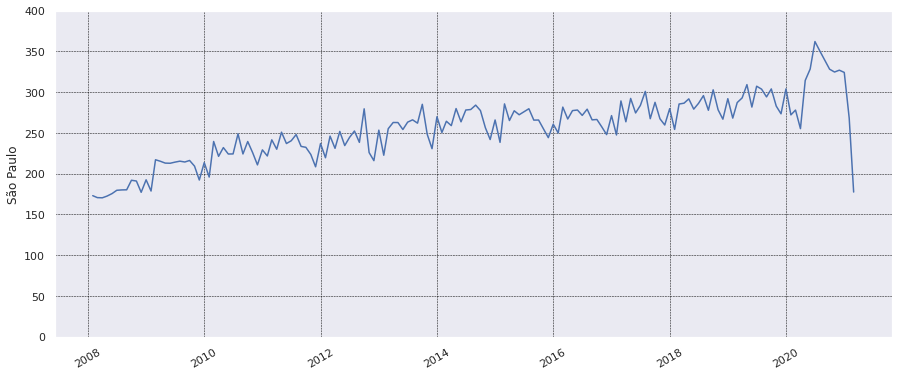

In [50]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mensal_data_index/1000000, x=mensal_data_index.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0,400)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

In [51]:
mensal_data_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 2008-02-01 to 2021-03-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            158 non-null    float64
 1   Minas Gerais         158 non-null    float64
 2   Paraná               158 non-null    float64
 3   Rio Grande do Sul    158 non-null    float64
 4   Rio de Janeiro       158 non-null    float64
 5   Bahia                158 non-null    float64
 6   Pernambuco           158 non-null    float64
 7   Santa Catarina       158 non-null    float64
 8   Ceará                158 non-null    float64
 9   Goiás                158 non-null    float64
 10  Pará                 158 non-null    float64
 11  Maranhão             158 non-null    float64
 12  Espírito Santo       158 non-null    float64
 13  Rio Grande do Norte  158 non-null    float64
 14  Paraíba              158 non-null    float64
 15  Distrito Federal     158 non-

##### Apresentação do MELT

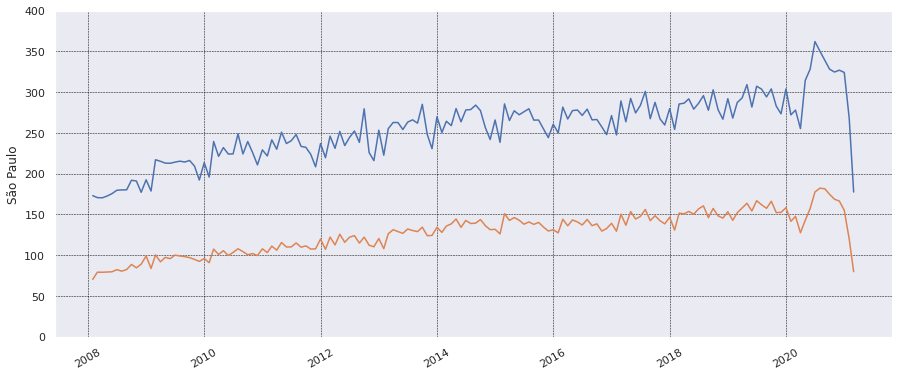

In [52]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mensal_data_index/1000000, x=mensal_data_index.index, y="São Paulo")
ax = sns.lineplot(data=mensal_data_index/1000000, x=mensal_data_index.index, y="Minas Gerais")
plt.xticks(rotation=30)
plt.ylim(0,400)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

# problemas:
# 1. eixos
# 2. legendas
# 3. serio mesmo? copy e paste das linhas do grafico?

In [53]:
mensal_data_index.head()

uf,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


Como ter mais de um x?
```
MES        VALOR     ESTADO
2008-03    170.48    Sao Paulo
2008-03     79.12    Minas Gerais
...
```

Tem que indicar para o Melt, qual coluna não quer "derreter", no nosso caso é o index.

In [54]:
mensal_aberto = mensal_data_index.reset_index().melt(id_vars=["index"], value_vars=mensal_data_index.columns)
mensal_aberto.columns = ["mes","uf","gasto"]
mensal_aberto["gasto_milhoes"] = mensal_aberto["gasto"] / 1000000
mensal_aberto

,mes,uf,gasto,gasto_milhoes
0,2008-02-01,São Paulo,172961999.58,172.96
1,2008-03-01,São Paulo,170556696.16,170.56
2,2008-04-01,São Paulo,170338163.23,170.34
3,2008-05-01,São Paulo,172462057.87,172.46
4,2008-06-01,São Paulo,175492995.85,175.49
...,...,...,...,...
4261,2020-11-01,Amapá,2714710.93,2.71
4262,2020-12-01,Amapá,2826612.42,2.83
4263,2021-01-01,Amapá,2513766.36,2.51
4264,2021-02-01,Amapá,1534733.18,1.53


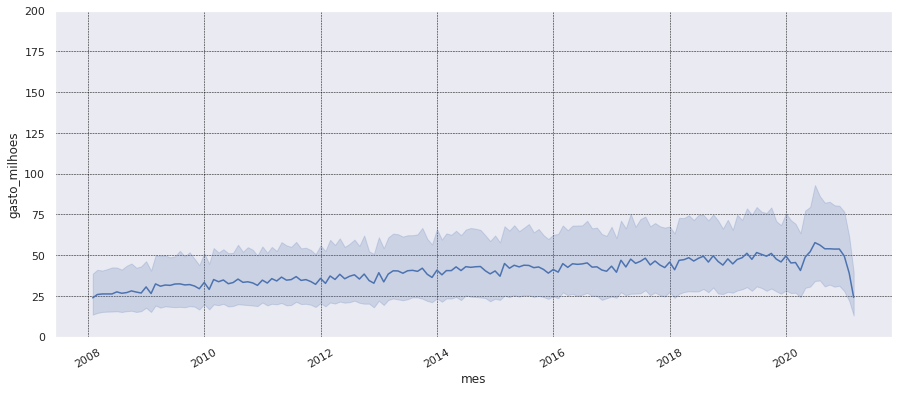

In [55]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto_milhoes")
plt.xticks(rotation=30)
plt.ylim(0,200)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

[Seaborn.lineplot  Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

"*By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.*"

Isso é nossa linha azul no gráfico (Intervalo de confiança).

hue = Agrupar os dados por um "valor/coluna"

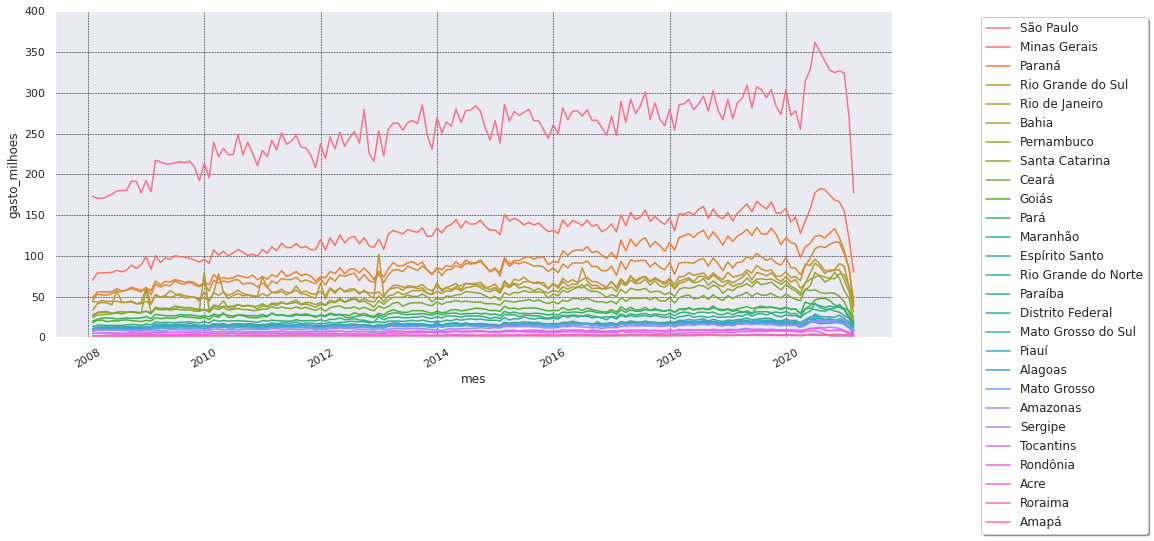

In [56]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto_milhoes", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0,400)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.1, 1))
plt.show()

# Melhorar o gráfico
# Muitos estados (muitas linhas) - Escolha os estados
# https://seaborn.pydata.org/tutorial/color_palettes.html

##**Desafios**

Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

* Escolha apenas alguns estados.
* Mude a palete de cores.
* Posicione a legenda de forma mais adequada.
* Adicione título principal e nos eixos x e y.


#### **Desafio 01**

A data é impressa no padrão ANSI, como imprimir no ptBR - DD/MM/AAAA? **strftime()**

E temos **strptime()**

A classe **datetime.timedelta** Expressa uma diferença de tempo entre duas  instâncias de date, time ou datetime expressa em microssegundos.

*datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)*

A duration expressing the difference between two date, time, or datetime instances to microsecond resolution.

Fontes: [Python datetime](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) e [Alura](https://www.alura.com.br/artigos/lidando-com-datas-e-horarios-no-python)

In [57]:
data_atual = date.today()
print(data_atual)
# type(data_atual) -> datetime.date

2021-06-05


In [58]:
# Retorna uma string com o formato informado
data_em_texto = data_atual.strftime('%d/%m/%Y')
print(data_em_texto)
# type(data_em_texto)  ->  str

05/06/2021


In [59]:
from datetime import datetime

datahora_em_texto = datetime.strftime(data_atual, '%d/%m/%Y %H:%M:%S')
print(datahora_em_texto)

05/06/2021 00:00:00


In [60]:
# Outro exemplo de formatação
print(data_atual.strftime("%A %d. %B %Y"))

Saturday 05. June 2021


---

Para utilizar Data e Hora, temos que utilizar o método de datetime.


---



In [61]:
from datetime import datetime

datahora_atual = datetime.today()
print(datahora_atual)
# type(datahora_atual) ->  datetime.datetime

2021-06-05 02:07:11.783547


In [62]:
# Se executar a linha abaixo, vai dar erro pois a função strptime, recebe uma string como parâmetro
datahora_em_texto = datetime.strftime(datahora_atual, '%d/%m/%Y %H:%M:%S')
print(datahora_em_texto)

05/06/2021 02:07:11


In [63]:
datahora_em_datetime = datetime.strptime(datahora_em_texto, '%d/%m/%Y %H:%M:%S')
print(datahora_em_datetime)
# type(datahora_em_datetime) -> datetime.datetime

2021-06-05 02:07:11


|                     | **strftime()**                                               | **strptime()**                                                           |
|---------------------|--------------------------------------------------------|--------------------------------------------------------------------|
| Usage               | Convert object to a string according to a given format | Parse a string into a datetime object given a corresponding format |
| Type of method      | Instance method                                        | Class method                                                       |
| Method of Signature | date; datetime; time                                   | datetime                                                           |
| Signature           | strftime(format)                                       | strptime(date_string, format)                                      |

#### **Desafio 02**

In [64]:
mensal_aberto.head()

,mes,uf,gasto,gasto_milhoes
0,2008-02-01,São Paulo,172961999.58,172.96
1,2008-03-01,São Paulo,170556696.16,170.56
2,2008-04-01,São Paulo,170338163.23,170.34
3,2008-05-01,São Paulo,172462057.87,172.46
4,2008-06-01,São Paulo,175492995.85,175.49


##### Normalizando com o pivot_tabel()

[Python Pivot Table Doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot)

*Return reshaped DataFrame organized by given index / column values.*

In [65]:
mensal_retorno = mensal_aberto.pivot_table(values=['gasto','gasto_milhoes'], columns='uf', index="mes")
mensal_retorno

gasto                         ... gasto_milhoes                    
uf               Acre     Alagoas      Amapá  ...       Sergipe São Paulo Tocantins
mes                                           ...                                  
2008-02-01 1743978.66  8112220.30 1275063.72  ...          4.64    172.96      5.05
2008-03-01 2057439.02  9210505.56 1177745.93  ...          5.02    170.56      5.20
2008-04-01 2057829.69 10466691.94 1396371.51  ...          5.27    170.34      5.34
2008-05-01 2226577.93  9844096.03 1411520.77  ...          5.37    172.46      5.34
2008-06-01 2112576.82 10299459.18 1420892.01  ...          4.98    175.49      5.40
...               ...         ...        ...  ...           ...       ...       ...
2020-11-01 3393958.27 18857578.34 2714710.93  ...         11.82    324.60      0.51
2020-12-01 3711660.71 17462663.52 2826612.42  ...         11.00    326.85      0.69
2021-01-01 3005561.16 16496784.27 2513766.36  ...          7.15    324.12      0.35
2021-02-01 2272733.90 12792571.64 1534733.18  ...          4.13    268.19      0.42
2021-03-01 1137341.65  8180887.21  989155.40  ...          3.08    177.41      0.93

[158 rows x 54 columns]

#### **Desafio 03**

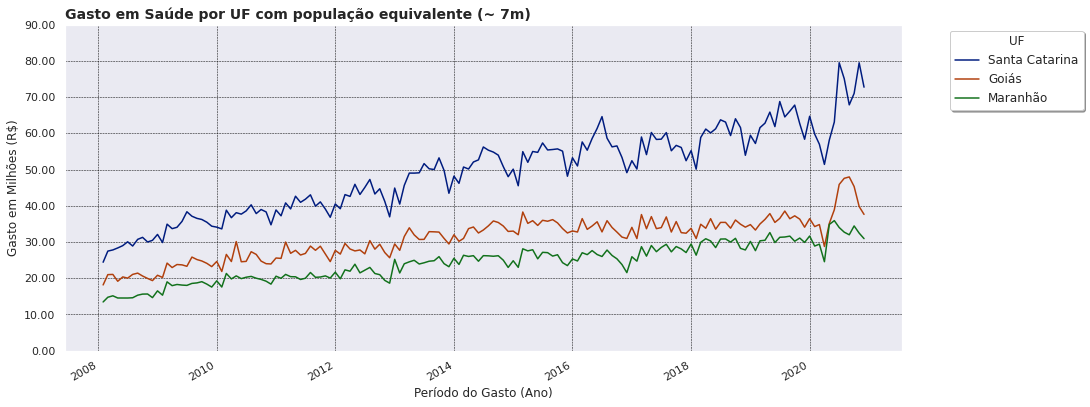

In [66]:
plt.figure(figsize=(15,6))

data_corte = datetime. strptime('01/01/2021', '%d/%M/%Y').date()
ax = sns.lineplot(data=mensal_aberto.query("uf in ['Santa Catarina','Maranhão','Goiás'] and mes < @data_corte"), 
                  x="mes", 
                  y="gasto_milhoes", 
                  hue="uf", 
                  palette='dark')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

ax.set_title("Gasto em Saúde por UF com população equivalente (~ 7m)", fontsize=14, weight='black', loc='left')
ax.set_xlabel('Período do Gasto (Ano)')
ax.set_ylabel('Gasto em Milhões (R$)')

plt.xticks(rotation=30, ha="right")
plt.ylim(0,90)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.05, 1), title='UF')
plt.show()

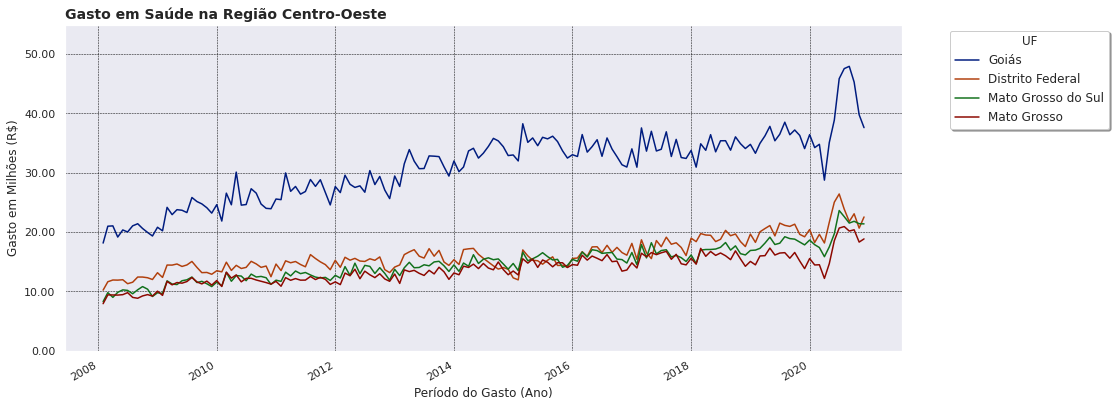

In [67]:
plt.figure(figsize=(15,6))

data_corte = datetime. strptime('01/01/2021', '%d/%M/%Y').date()
ax = sns.lineplot(data=mensal_aberto.query("uf in ['Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'] and mes < @data_corte"), 
                  x="mes", 
                  y="gasto_milhoes", 
                  hue="uf", 
                  palette='dark')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

ax.set_title("Gasto em Saúde na Região Centro-Oeste", fontsize=14, weight='black', loc='left')
ax.set_xlabel('Período do Gasto (Ano)')
ax.set_ylabel('Gasto em Milhões (R$)')

plt.xticks(rotation=30, ha="right")
plt.ylim(0,55)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.05, 1), title='UF')
plt.show()

População dos Estados do Centro-Oeste:
* Goiás = 7.113.540
* Distrito Federal = 3.055.149
* Mato Grosso do Sul = 2.809.394
* Mato Grosso = 3.526.220

O que aprendemos nessa aula:

* Quais caminhos não seguir na hora de trabalhar com Datatime;
* Como usar Map, aplicando uma função no DataFrame;
* Como usar o Melt no processamento dos dados.